# Задача 1 "Изучение критической температуры сверхпроводников"

https://www.kaggle.com/competitions/critical-temperature-of-superconductors

Данные о сверхпроводниках взяты из базы данных сверхпроводящих материалов, собранной Национальным институтом материаловедения Японии NIMS.

Данные содержат сведения о **21 263 сверхпроводников**.

*   Тренировочный набор - **17010** строк.
*   Тестовый набор - **4253** строк.

Для каждого сверхпроводника в данных приведены полная химическая формула сверхпроводника, а также 8 основных химических свойств (абсолютное значение, среднее, взвешенное среднее и так далее): атомная масса, энергия ионизации, радиус атома, плотность, удельная теплота плавления, энергия сродства к электрону, теплопроводность, валентность.


## Считывание данных

In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Считываем тренировочные данные
train = pd.read_csv("files//train.csv")
formula_train = pd.read_csv("files//formula_train.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Train_formula dataset shape: {formula_train.shape}")

Train dataset shape: (17010, 82)
Train_formula dataset shape: (17010, 88)


In [3]:
# Считываем тестовые данные
test = pd.read_csv("files//test.csv")
formula_test = pd.read_csv("files//formula_test.csv")

print(f"Test dataset shape: {test.shape}")
print(f"Test_formula dataset shape: {formula_test.shape}")

Test dataset shape: (4253, 81)
Test_formula dataset shape: (4253, 87)


In [4]:
# Посмотрим как выглядят данные
train.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [5]:
formula_train.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]

## Исследование данных

Прежде чем переходить к непосредственному построению модели, в первую очередь необходимо исследовать имеющихся у вас набор данных:
1. Какую задачу вы решаете (классификация, регрессия) и какая переменная является целевой?
2. Сколько переменных в данных и какого они типа?
3. Имеются ли в данных пропуски?

In [6]:
print("Number of missing values in train datasets:")
print(train.isna().sum().sum())
print(formula_train.isna().sum().sum())

Number of missing values in train datasets:
0
0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

In [8]:
formula_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              17010 non-null  float64
 1   He             17010 non-null  int64  
 2   Li             17010 non-null  float64
 3   Be             17010 non-null  float64
 4   B              17010 non-null  float64
 5   C              17010 non-null  float64
 6   N              17010 non-null  float64
 7   O              17010 non-null  float64
 8   F              17010 non-null  float64
 9   Ne             17010 non-null  int64  
 10  Na             17010 non-null  float64
 11  Mg             17010 non-null  float64
 12  Al             17010 non-null  float64
 13  Si             17010 non-null  float64
 14  P              17010 non-null  float64
 15  S              17010 non-null  float64
 16  Cl             17010 non-null  float64
 17  Ar             17010 non-null  int64  
 18  K     

In [9]:
print("Number of missing values in test datasets:")
print(test.isna().sum())
print(formula_test.isna().sum())

Number of missing values in test datasets:
number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
wtd_entropy_Valence      0
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
Length: 81, dtype: int64
H           0
He          0
Li          0
Be          0
B           0
           ..
Bi          0
Po          0
At          0
Rn          0
material    0
Length: 87, dtype: int64


In [10]:
# Полные сведения о каждой переменной в тренировочном наборе данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

## Предобработка данных

### **Тренировочные данные.**

В данной задаче у нас имеются два датасета для тренировки и для теста, для удобства сформируем один DataFrame.

Так как колонка с целевой переменной имеется в обоих датасетах, удалим её из одного, чтобы не дублировать.

In [11]:
formula_train = formula_train.drop(columns=['critical_temp'])

train_full = pd.concat([train, formula_train], axis=1)

print(f"Full Train dataset shape: {train_full.shape}")

Full Train dataset shape: (17010, 169)


In [12]:
# Удалим из данных ненужную колонку 'material'
train_full.drop(columns=['material'], inplace=True)

In [13]:
train_full.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  
0        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
1        47.094633  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
2        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
3        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  

[5 rows x 168 columns]

In [14]:
# Выделим из набора данных вектор признаков и вектор ответов
X = train_full.drop(columns=['critical_temp'])
y = train_full['critical_temp']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (17010, 167)
Target shape: (17010,)


### **Тестовые данные.**

Обработаем аналогичным образом тестовые данные.

In [15]:
test_full = pd.concat([test, formula_test], axis=1)

print(f"Full Test dataset shape: {test_full.shape}")

Full Test dataset shape: (4253, 168)


In [16]:
# Удалим из данных ненужную колонку 'material'
test_full.drop(columns=['material'], inplace=True)

## Обучение модели

## Разделение данных на подвыборки

Одна из целей построения алгоритмов машинного обучения, постоить такую модель, которая будет способная также хорошо работать с новыми данными, которых она не видела до этого, как и с теми данными на которых обучалась.

Это называется **обобщающей способностью** моделей.

**Обобщающая способность** — это способность аналитической модели, построенной на основе машинного обучения (нейронной сети, дерева решений, карты Кохонена и др.) выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, которые не участвовали в нем.

Именно поэтому при обучении модели, существующий набор данных разделяют на подвыборки:
- **тренировочную (train)** - набор данных на которых мы обучаем нашу модель
- **тестовую (test)** - это набор данных, которые мы не использовали для обучения нашей модели, т. е. это данные которые не видела наша модель. Набор данных используется для тестирования и оценки модели.

***Таким образом разделение данных на обучающую и тестовую выборки позволяет имитировать работу модели на новых/неизвестных данных.***


К тому же при использовании одних и тех же данных может возникнуть **Переобучение** — это термин, используемый для описания того, когда модель изучила эту взаимосвязь «слишком хорошо» для обучающих данных.

Под «слишком хорошо» мы подразумеваем скорее то, что он слишком близко изучил взаимосвязь — что он видит больше тенденций/корреляций/связей, чем существует на самом деле.

**Существует две основных стратегий разделения данных на подвыборки:**
1. отложенная выборка: разделение данных на две части (train и test)
2. Кроссвалидация

### Отложенная выбора

Данный подход эффективен при большом количестве данных, при маленьких размерах выборки может возникнуть множество различных проблем.

В библиотеки sklearn реализован метод позволяющий осуществить данное разбиение:

`from sklearn.model_selection import train_test_split`

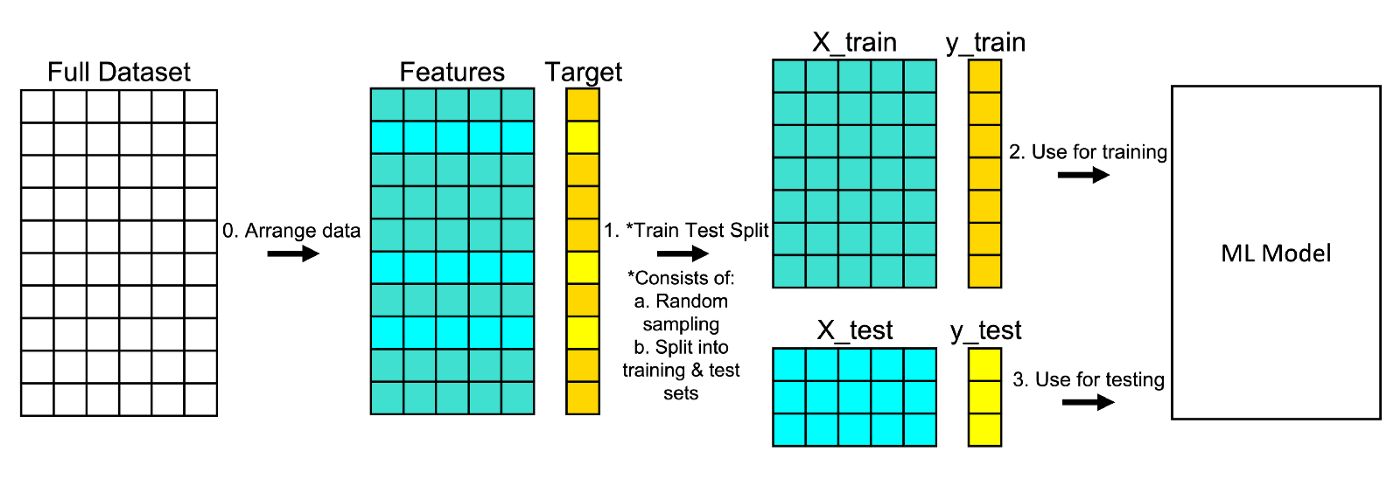

In [17]:
X.shape

(17010, 167)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (11907, 167), (11907,)
Test dataset size: (5103, 167), (5103,)


### Кроссвалидация

Это метод, используемый для обучения и оценки модели машинного обучения с использованием нескольких частей набора данных. Это означает, что вместо того, чтобы разбивать набор данных только на две части, одну для обучения и другую для тестирования, набор данных делится на большее количество подвыборок.

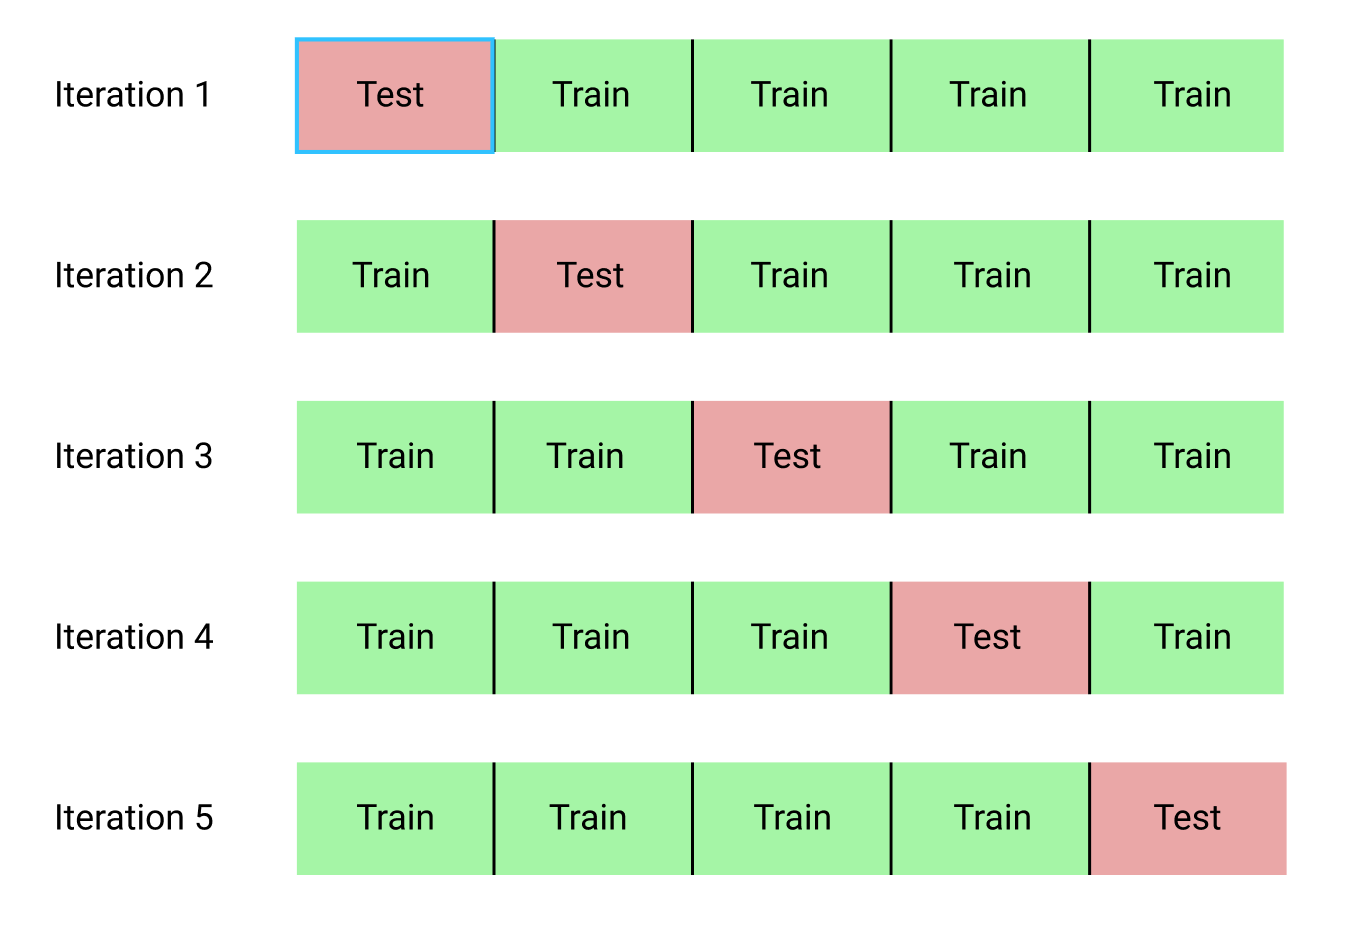

Выборка разбивается на k непересекающихся подмножеств, и каждое из них по очереди выступает в качестве контрольной выборки (а остальные k − 1 частей — в качестве обучающей выборки). В качестве результата выдается средняя ошибка по всем контрольным выборкам.

Значение k должно быть тщательно выбрано для выборки данных.

Плохо выбранное значение для k может привести к неправильному представлению о качестве модели, например, к оценке с высокой дисперсией (которая может сильно измениться на основе данных, используемых в соответствии с моделью), или к высокой предвзятости (например, переоценка качества модели).

k выбирают обычно 5 или 10, но нет формального правила. По мере того как k становится больше, разница в размере между тестовой выборкой и подмножествами resampling становится мала. По мере уменьшения этой разницы предвзятость к технике становится меньше.


В библиотеки sklearn также реализован метод кросс валидации:

```
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
```

Конструктор выглядит следующим образом:

`sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)`

где:
- estimator - модель машинного обучения
- X - вектор признаков
- y - вектор целевой переменной
- scoring - оценка модели
- cv - количество фолдов (подвыборок)

### Обучение

В данном примере мы решаем задачу регрессии и для её решения воспользуемся алгоритмом ***Линейной регрессии***.

In [19]:
# импортируем необходмимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

В нашем наборе данных **167** различных признаков, значит уравнение линейной регрессии будет выглядеть следующим образом в общем виде:

$y = w_0 + w_1*x_1 + w_2*x_2 + ... + w_{167}*x_{167}$

И задача линейной регрессии сводится к рассчёту коэффицентов (весов $w_i$) при признаках $x_i$.

In [20]:
# Создадим модель линейной регрессии
model = LinearRegression()

# Обучим линейную регрессию на тренировочном стандартизированном наборе данных
# На этапе обучения алгоритм рассчитывает веса признаков и строит линейное уравнение регрессии
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Веса всех признаков (w1, ..., w167): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1, ..., w167):  [ 2.49794187e+00  9.47791823e-01 -1.32439167e+00 -4.85467646e-01
  8.00310131e-01 -2.33621409e+01 -2.85612938e+00  2.03415988e-01
  9.78700110e-02 -5.29085013e-01  1.93130242e-02 -2.14911809e-01
  7.63572232e-02  1.91823011e-01 -3.02216504e-02 -3.55323054e+01
  5.91690856e+01  3.90639041e-02  2.31022681e-02 -6.55715466e-02
 -4.66262629e-02 -7.23209998e-01  2.16755499e+00  4.47451989e-01
 -1.85883457e+00 -1.41162229e+01  2.40711149e+01  7.06497285e-02
 -7.39671832e-02 -2.80699435e-01 -8.62227132e-02 -4.86203340e-03
  4.02567158e-03  2.46060944e-04  1.73938983e-04 -6.24191448e+00
  3.29312084e-01 -8.45687882e-04 -3.68140362e-04  2.51661992e-03
 -4.28461288e-04 -6.45523858e-02  3.32260494e-01  1.31524532e-01
 -4.13120880e-01  9.29319427e+00 -2.04571670e+01 -3.39241880e-01
 -7.36476615e-02  1.19708152e+00 -4.85491464e-01  1.32395330e+00
 -2.00391331e+00 -9.63196674e-01  1.48605498e+00 -2.04313414e+01
  2.21840796e+01 -1.93584460e-01  5.93456575e-01 -9.

In [22]:
# Создадим массив названия признаков
features = test_full.columns

In [23]:
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

Coefficient                      features
76   -70.837310           wtd_entropy_Valence
15   -35.532305                   entropy_fie
5    -23.362141           entropy_atomic_mass
46   -20.457167  wtd_entropy_ElectronAffinity
55   -20.431341            entropy_FusionHeat
..          ...                           ...
65    15.576495   entropy_ThermalConductivity
56    22.184080        wtd_entropy_FusionHeat
26    24.071115     wtd_entropy_atomic_radius
16    59.169086               wtd_entropy_fie
75    66.807747               entropy_Valence

[167 rows x 2 columns]

Предскажем результат для тех же самых тренировочных данных и оценим наш алгоритм линейной регрессии с помощью различных оценок регрессии:
1. **Средняя абсолютная ошибка (MAE)** – это среднее значение абсолютного значения ошибок. Он рассчитывается как:

$MAE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|$

где $n$ - количество наблюдений

2. **Среднеквадратичная ошибка (MSE)** – это среднее значение квадратов ошибок и вычисляется как:

$MAE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|^2$

где $n$ - количество наблюдений

В идеальном случае MAE и MSE равны 0.

In [24]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 12.824822686549593
Mean Squared Error: 774.0846985924451


**3. Коэффицент детерминации**


$R^2 = 1 - \frac{sum_{i=1}^n|y_{pred_i}-y_i|^2$}{sum_{i=1}^n|y_{_i}-y_{mean}|^2$}$

где $n$ - количество наблюдений, $y_i$ — реальные значения $y$ (т.е. правильные ответы) в каждом наблюдении, $y_{pred_i}$ — значения, предсказанные моделью, $y_{mean}$ — среднее по всем реальным значениям $y_i$.

Если значение оценки R в квадрате равно 1, это означает, что модель идеальна, а если ее значение равно 0, это означает, что модель будет плохо работать с неизвестным набором данных. Это также означает, что чем ближе значение оценки R в квадрате к 1, тем точнее обучается модель.


In [25]:
print('R2 score:', r2_score(y_test, y_pred))

R2 score: 0.35144749289638144


Попробуем обучить модель с помощью кросс валидации.

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 5
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print(scores)
print(scores.mean())

[ 0.7538253   0.74826435 -0.71675976  0.76756534  0.19915868]
0.3504107834912662


## Обучение модели на одном признаке для визуалиции прямой регрессии

Обучим модель на 1 признаке для визуализации прямой линейной регрессии на двумерном графике.

In [27]:
train_full['wtd_gmean_atomic_radius']

0         84.528423
1         84.370167
2         84.214573
3         84.371352
4         84.843442
            ...    
17005    134.233861
17006     89.633687
17007    191.826893
17008    188.514109
17009    136.084313
Name: wtd_gmean_atomic_radius, Length: 17010, dtype: float64

In [28]:
X_1 = train_full[['wtd_gmean_atomic_radius']].values

# Создадим модель линейной регрессии
model = LinearRegression()

# Обучим линейную регрессию на тренировочном стандартизированном наборе данных
# На этапе обучения алгоритм рассчитывает веса признаков и строит линейное уравнение регрессии
model.fit(X_1, y)

print('Вес признака (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Вес признака (w1):  [-0.38950027]
Свободный коэффицент уравнения w0: 81.59500891328818


Исходя из полученных коэффицентов, уравнение прямой будет выглядеть следующим образом:

$y = 81.87 - 0.391*x_1$

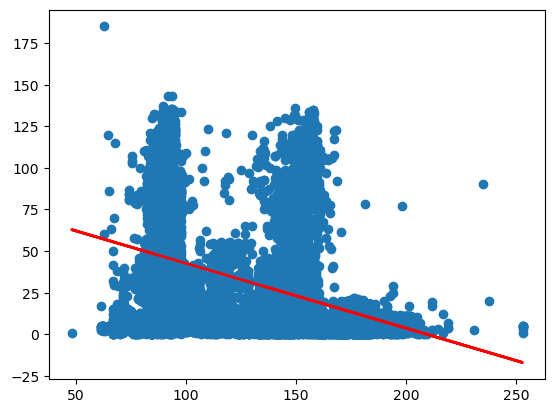

In [29]:
plt.scatter(X_1, y)
plt.plot(X_1, model.predict(X_1), color='red', linewidth=2)

## Предсказание ответа для тестового набора данных

In [30]:
test_full

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                      5         92.729214             61.051113   
1                      4         64.632217             55.790060   
2                      4         76.444563             65.834647   
3                      4         96.032850             77.279467   
4                      4         96.451652             75.978308   
...                  ...               ...                   ...   
4248                   7         64.073395             68.998545   
4249                   2        138.715500            172.638000   
4250                   3         86.607717             80.820500   
4251                   3         89.389833             89.389833   
4252                   3         89.389833             89.389833   

      gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0             73.132787              37.513930             1.449309   
1             48.775792              35.178830             1.139875   
2             59.356672              48.955994             1.199541   
3             69.515930              53.611120             1.159784   
4             69.689342              53.146925             1.158346   
...                 ...                    ...                  ...   
4248          50.714667              54.256502             1.752162   
4249         130.332449             168.161451             0.633338   
4250          80.298396              75.396707             1.023455   
4251          63.694713              63.694713             0.782574   
4252          63.694713              63.694713             0.782574   

      wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                    1.146919         122.906070              35.741099   
1                    0.931491         122.906070              35.851917   
2                    1.241867         121.327600              22.132267   
3                    1.267452         151.259600              22.543367   
4                    1.259726         152.934810              24.421050   
...                       ...                ...                    ...   
4248                 1.419430         122.906070              27.671218   
4249                 0.267607          94.983000             146.574000   
4250                 1.075786          80.909352              13.727825   
4251                 0.782574         164.131500              54.710500   
4252                 0.782574         164.131500              54.710500   

      std_atomic_mass  ...   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  
0           47.094633  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
1           46.059083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
2           43.823354  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
3           59.663892  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4           60.166149  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  
4248        39.330466  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4249        47.491500  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4250        34.049031  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4251        73.156893  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4252        73.156893  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  

[4253 rows x 167 columns]

In [31]:
model.fit(train_full.drop('critical_temp', axis=1), train_full['critical_temp'])

LinearRegression()

In [32]:
y_pred_test = model.predict(test_full)

In [33]:
y_pred_test

array([42.11079012, 25.40662317, 68.5848528 , ...,  0.15656144,
       18.54899465, 18.54899465])

In [34]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test = y_pred_test.reset_index()

y_pred_test

index  critical_temp
0         0      42.110790
1         1      25.406623
2         2      68.584853
3         3      62.682028
4         4      66.684339
...     ...            ...
4248   4248      15.757331
4249   4249       2.410118
4250   4250       0.156561
4251   4251      18.548995
4252   4252      18.548995

[4253 rows x 2 columns]

# Самостоятельная работа. Усовершенствование модели.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor

**RandomForestRegressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500]}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'n_estimators': 200}


In [37]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 score: {r2_score(y_test, y_pred)}')

MSE: 96.93131369987802
R^2 score: 0.9187878966846732


**XGBoost**

In [44]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

param_grid = {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 7, 10], 'learning_rate': [0.01, 0.1, 0.2, 0.3]}

xgb_grid = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_grid, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [45]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 score: {r2_score(y_test, y_pred)}')

MSE: 96.83064449443279
R^2 score: 0.9188722405112575


In [46]:
y_pred_test = xgb.predict(test_full)

In [47]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test = y_pred_test.reset_index()

y_pred_test

index  critical_temp
0         0      24.579687
1         1      28.785490
2         2      88.655396
3         3      59.824406
4         4      82.118080
...     ...            ...
4248   4248      23.650404
4249   4249       5.965819
4250   4250       2.146549
4251   4251       2.384355
4252   4252       2.384355

[4253 rows x 2 columns]

In [49]:
y_pred_test.to_csv("predict.csv", index=False)